<a href="https://colab.research.google.com/github/lkhart/kaggle_house_prices/blob/main/house_price_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Exploratory Data Analysis**
#### [Kaggle Competition Entry](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/description)/Class Assignment 
#### Laura Hart - MSDS 422 - Winter 2022

The objective of this exercise is to predict sale price of homes in Ames, Iowa given the available training data. First, we conduct an exploratory analysis of the provided data to understand distributions, begin identifying potential predictors of sale price, and explore transformations and feature creation that will prepare the data for modeling.

### Setup

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
train_df = pd.read_csv('train.csv')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Understanding SalePrice Distribution**

By reviewing the descriptive statistics and visualizations generated here, we're able to understand the distribution of SalePrice among Ames homes. The median home SalePrice is \$163,000, while the average home SalePrice is \$180,921. This tells us that the distribution of SalePrice is right-skewed, which can be seen in the histogram below. Finally, we see that while there are homes with SalePrice > \$350,000 and up to $755,000, these homes are considered outliers within our dataset.

In [4]:
# basic descriptive stats on SalePrice Distribution
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

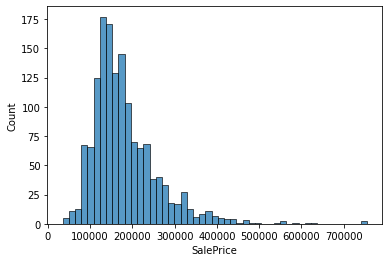

In [5]:
# histogram
sns.histplot(x='SalePrice', data=train_df).set_title=('SalePrice Distribution')

Text(0.5, 1.0, 'SalePrice Distribution')

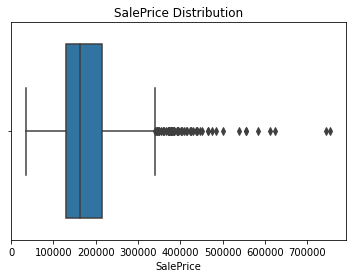

In [6]:
# boxplot
sns.boxplot(x='SalePrice', data=train_df).set_title('SalePrice Distribution')

## **Missing Data and Outliers**

The Kaggle files included a .txt file with descriptions of each column and definitions of categorical variable values. When dealing with missing values, we'll have to consider the context to determine whether the NA should be replaced (with a 0 or 'None', for example) or imputed.

Most columns appear to have data entered for all or most rows, but we do see null values in both categorical and quantitative variables within the dataset:

In [7]:
# get counts of NA values
ct_na = train_df.isna().sum().sort_values(ascending=False)
ct_na[ct_na > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

For many of those columns that are categorical variables and contain 'NA' values, the 'NA' value indicates that the category does not apply. For example, PoolQC is a categorical variable indicating pool quality, and a value of 'NA' indicates that the house does not have a pool. In these cases, I will replace the 'NA' values with 'None'. This modification will apply to:


*   PoolQC
*   MiscFeature
*   Alley
*   Fence
*   FireplaceQu
*   GarageCond
*   GarageType
*   GarageYrBlt
*   GarageFinish
*   GarageQual
*   BsmtExposure
*   BsmtFinType2
*   BsmtFinType1
*   BsmtCond
*   BsmtQual
*   MasVnrType




In [8]:
train_df.PoolQC.fillna('None', inplace=True)
train_df.MiscFeature.fillna('None', inplace=True)
train_df.Alley.fillna('None', inplace=True)
train_df.Fence.fillna('None', inplace=True)
train_df.FireplaceQu.fillna('None', inplace=True)
train_df.GarageCond.fillna('None', inplace=True)
train_df.GarageType.fillna('None', inplace=True)
train_df.GarageYrBlt.fillna('None', inplace=True)
train_df.GarageFinish.fillna('None', inplace=True)
train_df.GarageQual.fillna('None', inplace=True)
train_df.BsmtExposure.fillna('None', inplace=True)
train_df.BsmtFinType2.fillna('None', inplace=True)
train_df.BsmtFinType1.fillna('None', inplace=True)
train_df.BsmtCond.fillna('None', inplace=True)
train_df.BsmtQual.fillna('None', inplace=True)
train_df.MasVnrType.fillna('None', inplace=True)


For the categorical column 'Electrical', there shouldn't be an option for a house to not have a category applied. Because there is only 1 case where Electrical is NA, we will replace this NA with the most common Electrical type.

In [9]:
# see how common each Electrical value is
train_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [10]:
# replace Electrical = NA with most common Electrical value
train_df.Electrical.fillna(train_df.Electrical.mode()[0], inplace=True)

For those columns that are quantitative variables and contain 'NA' values, we must determine whether the 'NA' can be replaced with a 0, imputed from other information, or if the column needs to be dropped from the dataset if not applicable to most observations.

NA values for LotFrontage should not necessarily be replaced with 0, as this value may be missing but not equal to 0. Let's look at the distribution of LotFrontage:



In [11]:
# basic descriptive stats on LotFrontage Distribution
train_df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
# basic descriptive stats on LotFrontage distribution by Neighborhood
train_df['LotFrontage'].groupby(train_df['Neighborhood']).describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,14.0,47.142857,4.990100,43.0,43.00,43.0,53.00,53.0
Blueste,2.0,24.000000,0.000000,24.0,24.00,24.0,24.00,24.0
BrDale,16.0,21.562500,1.209339,21.0,21.00,21.0,21.00,24.0
BrkSide,51.0,57.509804,15.528519,50.0,50.00,52.0,60.00,144.0
ClearCr,13.0,83.461538,18.875096,62.0,75.00,80.0,83.00,138.0
CollgCr,126.0,71.682540,16.359291,36.0,64.00,70.0,78.00,122.0
Crawfor,41.0,71.804878,19.436074,40.0,55.00,74.0,82.00,130.0
Edwards,92.0,68.217391,32.431780,24.0,58.75,65.5,74.25,313.0
Gilbert,49.0,79.877551,32.748176,42.0,60.00,65.0,93.00,182.0


The median value of LotFrontage appears to vary by Neighborhood. To deal with NA values in LotFrontage, we will impute the LotFrontage value by applying the median LotFrontage value among homes in the same Neighborhood.

In [13]:
# replace LotFrontage = NA with median LotFrontage for associated Neighborhood
train_df.LotFrontage = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

NA values for MasVnrArea apply to the same rows that had an NA value for MasVnrType; as seen below, a value of 0 for MasVnrArea is most common, and therefore we can comfortably replace the NA MasVnrArea values with 0.

In [14]:
# basic descriptive stats on MasVnrArea Distribution
train_df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [15]:
train_df.MasVnrArea.fillna(0, inplace=True)

In [16]:
# confirm that all NA values have been addressed
# get counts of NA values
ct_na = train_df.isna().sum().sort_values(ascending=False)
ct_na[ct_na > 0]

Series([], dtype: int64)

Next, I'm looking at the quantitative variables to identify any outliers. Depending on the appearance of a quantitative variable's distribution, I may choose to drop outliers, apply a transformation to the variable's distribution*, or create a categorical variable by binning ranges of a quantitative variable (ex. if there is a clear bimodal distribution). I will make these changes in the next phase, after the exploratory analysis (for now just getting an idea of distributions).

*Transforming the variable distribution would only be necessary for certain types of modeling techniques. Right now, I'm leaning toward a logistic regression approach for modeling this data, and normalization would be needed. I will circle back and nix this part if I decide to apply a technique that does not require normalization (such as random forest).

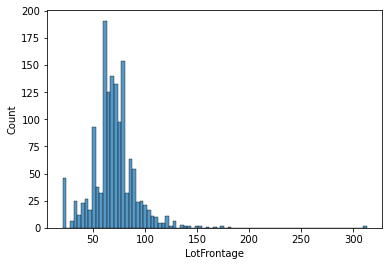

In [17]:
# histogram
sns.histplot(x='LotFrontage', data=train_df).set_title=('LotFrontage Distribution')

# lot frontage resembles a normal distribution, with some outliers on the higher end. this variable will need to be normalized.

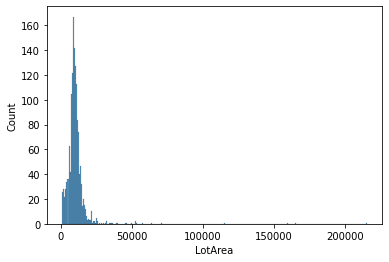

In [18]:
# histogram
sns.histplot(x='LotArea', data=train_df).set_title=('LotArea Distribution')

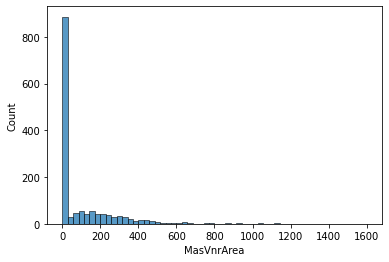

In [19]:
# histogram
sns.histplot(x='MasVnrArea', data=train_df).set_title=('MasVnrArea Distribution')

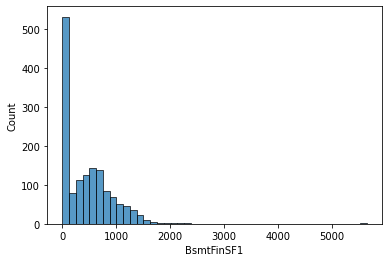

In [20]:
# histogram
sns.histplot(x='BsmtFinSF1', data=train_df).set_title=('BsmtFinSF1 Distribution')

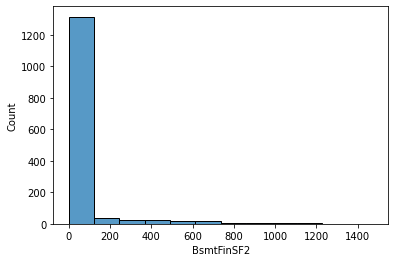

In [21]:
# histogram
sns.histplot(x='BsmtFinSF2', data=train_df).set_title=('BsmtFinSF2 Distribution')

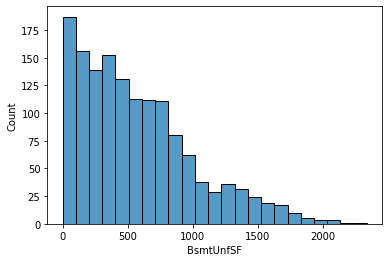

In [22]:
# histogram
sns.histplot(x='BsmtUnfSF', data=train_df).set_title=('BsmtUnfSF Distribution')

# this variable is a good example of one that has a skewed distribution, and I will handle this by applying a log/power transformation.

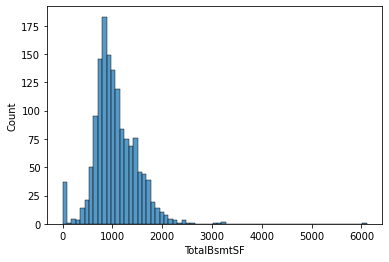

In [53]:
# histogram
sns.histplot(x='TotalBsmtSF', data=train_df).set_title=('TotalBsmtSF Distribution')

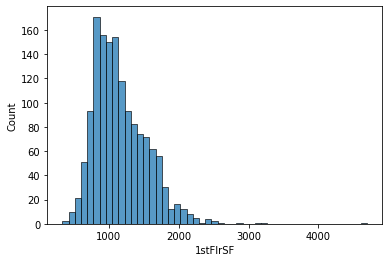

In [24]:
# histogram
sns.histplot(x='1stFlrSF', data=train_df).set_title=('1stFlrSF Distribution')

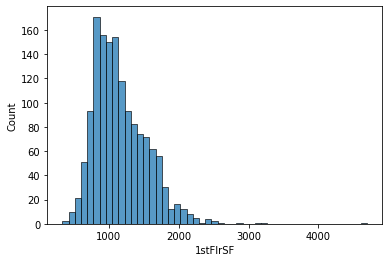

In [25]:
# histogram
sns.histplot(x='1stFlrSF', data=train_df).set_title=('1stFlrSF Distribution')

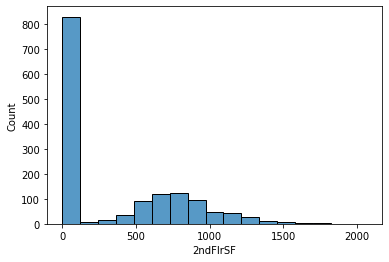

In [26]:
# histogram
sns.histplot(x='2ndFlrSF', data=train_df).set_title=('2ndFlrSF Distribution')

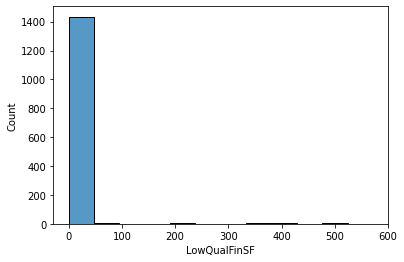

In [27]:
# histogram
sns.histplot(x='LowQualFinSF', data=train_df).set_title=('LowQualFinSF Distribution')

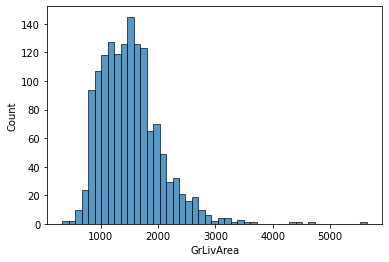

In [54]:
# histogram
sns.histplot(x='GrLivArea', data=train_df).set_title=('GrLivArea Distribution')

# another good candidate for normalization - shape resembles normal distribution (with some right skewness)

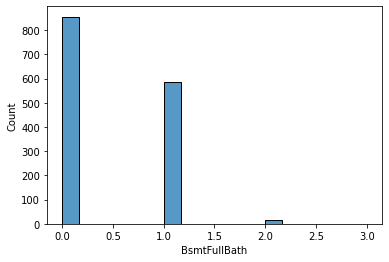

In [29]:
# histogram
sns.histplot(x='BsmtFullBath', data=train_df).set_title=('BsmtFullBath Distribution')

# discrete quantitative variables like this and other bedroom/bathroom counts may make for better categorical variables

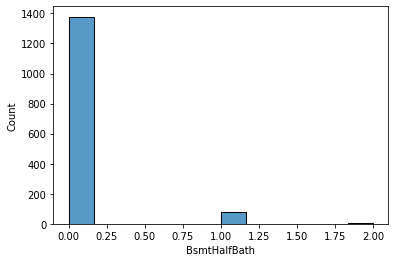

In [30]:
# histogram
sns.histplot(x='BsmtHalfBath', data=train_df).set_title=('BsmtHlafBath Distribution')

# discrete quantitative variables like this and other bedroom/bathroom counts may make for better categorical variables

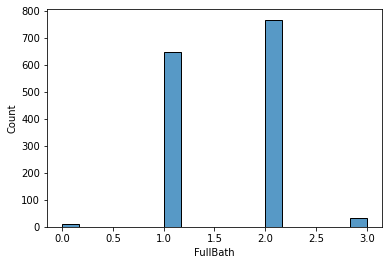

In [31]:
# histogram
sns.histplot(x='FullBath', data=train_df).set_title=('FullBath Distribution')

# discrete quantitative variables like this and other bedroom/bathroom counts may make for better categorical variables

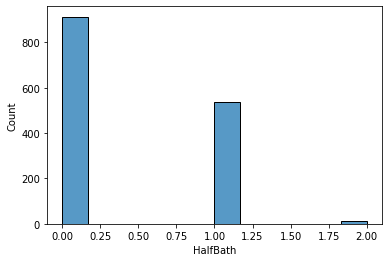

In [34]:
# histogram
sns.histplot(x='HalfBath', data=train_df).set_title=('HalfBath Distribution')

# discrete quantitative variables like this and other bedroom/bathroom counts may make for better categorical variables

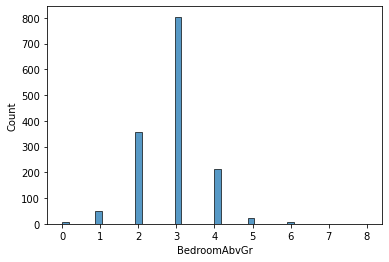

In [42]:
# histogram
sns.histplot(x='BedroomAbvGr', data=train_df).set_title=('BedroomAvbGr Distribution')

# discrete quantitative variables like this and other bedroom/bathroom counts may make for better categorical variables

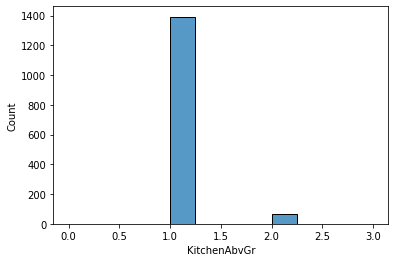

In [43]:
# histogram
sns.histplot(x='BsmtFullBath', data=train_df).set_title=('BsmtFullBath Distribution')

# discrete quantitative variables like this and other bedroom/bathroom counts may make for better categorical variables

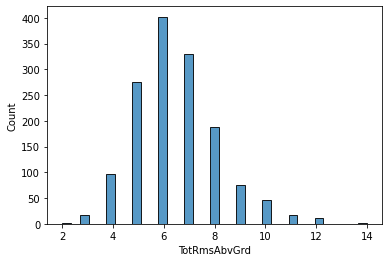

In [44]:
# histogram
sns.histplot(x='TotRmsAbvGrd', data=train_df).set_title=('TotRmsAbvGrd Distribution')

# discrete quantitative variables like this and other bedroom/bathroom counts may make for better categorical variables

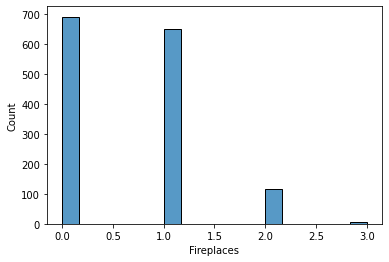

In [45]:
# histogram
sns.histplot(x='Fireplaces', data=train_df).set_title=('Fireplaces Distribution')

# discrete quantitative variables like this and other bedroom/bathroom counts may make for better categorical variables

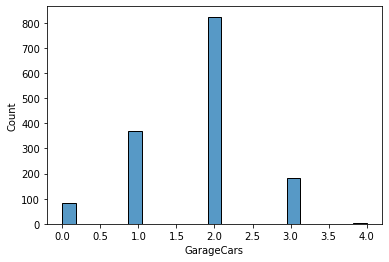

In [46]:
# histogram
sns.histplot(x='GarageCars', data=train_df).set_title=('GarageCars Distribution')

# discrete quantitative variables like this and other bedroom/bathroom counts may make for better categorical variables

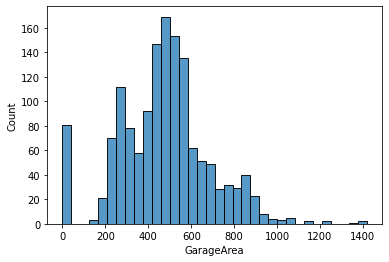

In [47]:
# histogram
sns.histplot(x='GarageArea', data=train_df).set_title=('GarageArea Distribution')

## **Potential Predictors of SalePrice**

Initially, I want to look at 3 variables which I would expect to have a strong relationship with our dependent variable, SalePrice. Looking at the actual relationships between these variables and SalePrice will help me understand whether they may act as strong predictors of the SalePrice value.
Potential predictors:

*   GrLivArea - above ground living area in square feet
*   Neighborhood - neighborhood in Ames, IA
*   OverallCond - overall condition of the house (rating 1-10)





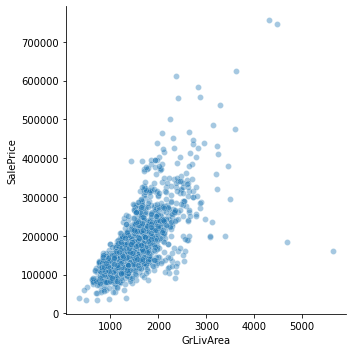

In [61]:
# scatter plot showing relationship between GrLivArea and SalePrice
sns.relplot(x='GrLivArea', y='SalePrice', kind='scatter', alpha=0.4, data=train_df).set_title=('SalePrice by GrLivArea')

As seen above, there appears to be a strong positive, linear relationship between GrLivArea and SalePrice. There appear to be a few exceptions to this relationship, notably the two points in the bottom right corner of the plot, but otherwise most points tend to follow the trend of a positive correlation.

[Text(0, 0, 'CollgCr'),
 Text(0, 0, 'Veenker'),
 Text(0, 0, 'Crawfor'),
 Text(0, 0, 'NoRidge'),
 Text(0, 0, 'Mitchel'),
 Text(0, 0, 'Somerst'),
 Text(0, 0, 'NWAmes'),
 Text(0, 0, 'OldTown'),
 Text(0, 0, 'BrkSide'),
 Text(0, 0, 'Sawyer'),
 Text(0, 0, 'NridgHt'),
 Text(0, 0, 'NAmes'),
 Text(0, 0, 'SawyerW'),
 Text(0, 0, 'IDOTRR'),
 Text(0, 0, 'MeadowV'),
 Text(0, 0, 'Edwards'),
 Text(0, 0, 'Timber'),
 Text(0, 0, 'Gilbert'),
 Text(0, 0, 'StoneBr'),
 Text(0, 0, 'ClearCr'),
 Text(0, 0, 'NPkVill'),
 Text(0, 0, 'Blmngtn'),
 Text(0, 0, 'BrDale'),
 Text(0, 0, 'SWISU'),
 Text(0, 0, 'Blueste')]

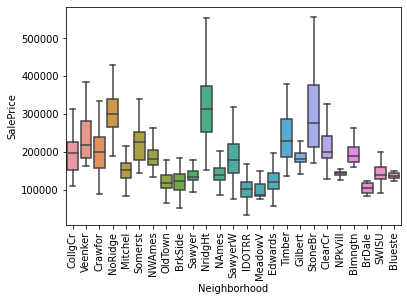

In [74]:
# boxplots of SalePrice for each neighborhood
ax = sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

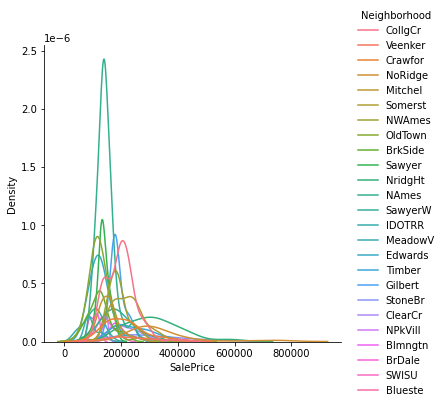

In [67]:
# density plot of SalePrice colored by Neighborhood
sns.displot(x='SalePrice', hue='Neighborhood', data=train_df, kind='kde')

As represented in the two plots above, the distribution of SalePrice does have some variation across neighborhoods. Notably, NridgHt and StoneBr appear to include higher price homes in their distribution than most other neighborhoods (excluding outliers), and neighborhoods like NPkVill and Blueste appear to have more limited SalePrice ranges within them. These insights suggest that neighborhood may have value as a predictor of SalePrice.

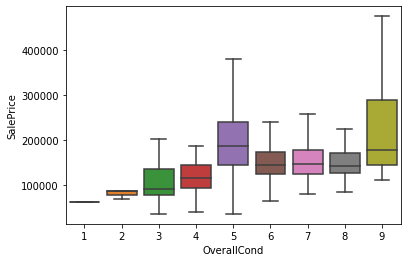

In [75]:
# boxplots of SalePrice by OverallCond
sns.boxplot(x='OverallCond', y='SalePrice', data=train_df, showfliers=False)

Among lower values of OverallCond (which is a ranked categorical variable), we see that median SalePrice tends to increase with each increase in OverallCond. Notably, OverallCond=5 has the highest median SalePrice, and OverallCond values above 5 tend to remain fairly steady, with the exception of 9, which includes a broad range above its 50th percentile. All things considered, this variable may not be as effective of a predictor as I thought it would be; perhaps binning the OverallCond values (ex. OverallCond <=4 vs. >4) would make this variable more valuable for modeling. 

## **Feature Creation to Generate New Predictors**

Several of our quantitative variables actually suggest that a categorical variable should exist to indicate whether or not a home feature is present. These variables include:


*   PoolArea - whether or not home has pool
*   2ndFlrSF - whether or not home has a 2nd floor
*   GarageArea - whether or not home has a garage
*   TotalBsmtSF - whether or not home has a basement
*   Fireplaces - whether or not home has a fireplace

(other variables may also be used to indicate whether a given home feature is present, but these are all quantitative).

For each of these variables, I will create a new binary variable that equals 1 when the home feature is present (measurement value > 0) and 0 when that feature is absent (measurement value = 0).


In [77]:
# add each new binary variable to train_df

train_df['HasPool'] = np.where(train_df['PoolArea'] == 0, 0, 1)
train_df['Has2ndFlr'] = np.where(train_df['2ndFlrSF'] == 0, 0, 1)
train_df['HasGarage'] = np.where(train_df['GarageArea'] == 0, 0, 1)
train_df['HasBasement'] = np.where(train_df['TotalBsmtSF'] == 0, 0, 1)
train_df['HasFireplace'] = np.where(train_df['Fireplaces'] == 0, 0, 1)

For each of these new variables, I will generate a boxplot to visualize whether the presence of a given home feature is related to SalePrice distribution:

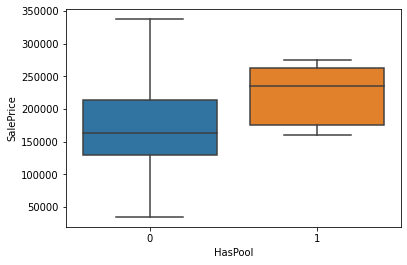

In [78]:
# boxplots of SalePrice by HasPool
sns.boxplot(x='HasPool', y='SalePrice', data=train_df, showfliers=False)

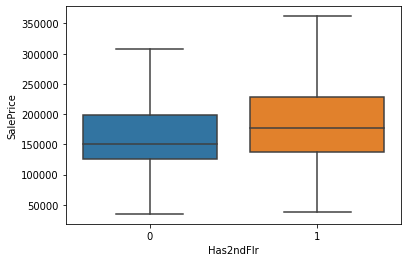

In [79]:
# boxplots of SalePrice by Has2ndFlr
sns.boxplot(x='Has2ndFlr', y='SalePrice', data=train_df, showfliers=False)

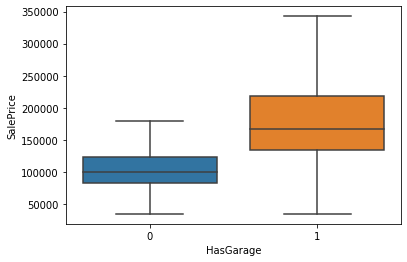

In [80]:
# boxplots of SalePrice by HasGarage
sns.boxplot(x='HasGarage', y='SalePrice', data=train_df, showfliers=False)

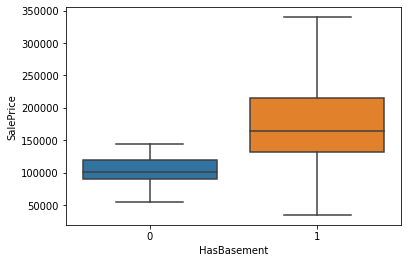

In [81]:
# boxplots of SalePrice by HasBasement
sns.boxplot(x='HasBasement', y='SalePrice', data=train_df, showfliers=False)

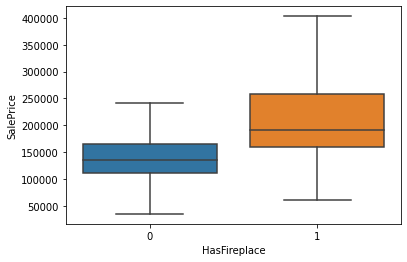

In [82]:
# boxplots of SalePrice by HasFireplace
sns.boxplot(x='HasFireplace', y='SalePrice', data=train_df, showfliers=False)

As seen above, the presence of a pool, garage, basement, or fireplace appears to positively differentiate the home's SalePrice distribution from that of homes that do not have those features, respectively. The presence of a 2nd floor does not appear to differentiate SalePrice distribution from homes which do not have a 2nd floor. 

## **Dependent Variable Scaling**

In [93]:
# define quantitative variables which need to be scaled
vars_to_scale = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [94]:
# apply min-max scaling to quantitative variables
mmscaler = MinMaxScaler()
train_df[vars_to_scale] = mmscaler.fit_transform(train_df[vars_to_scale])

In [96]:
# apply standard scaling to quantitative variables
sc = StandardScaler()
train_df[vars_to_scale] = sc.fit_transform(train_df[vars_to_scale])